In [1]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

# install joblib. This is used to save the model. 
# # Restart your kernel after installing 
# !pip install joblib

# !pip install xgboost

In [2]:
# Import the dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [3]:
# Import the dependencies
from sklearn.metrics import plot_confusion_matrix

## Load the dataset

In [4]:
# import csv into a dataframe
data_read = pd.read_csv("../Resources/fraudTrain.csv")
data_read.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Exploratory Data Analysis

In [6]:
data_read.isnull().values.any()

False

In [7]:
data_read.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
data_sample = data_read[:10000]

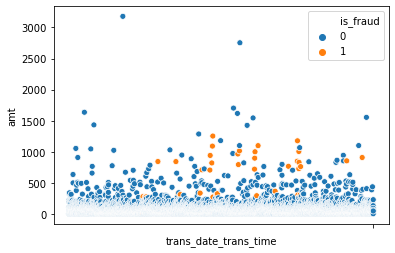

In [9]:
# Scatter plot with transaction date and amount
sns.scatterplot(data = data_sample, x ='trans_date_trans_time', y = 'amt', hue = 'is_fraud')
plt.xticks("")
plt.show()

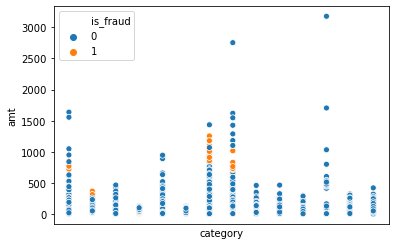

In [10]:
sns.scatterplot(data = data_sample, x ='category', y = 'amt', hue = 'is_fraud')
plt.xticks("")
plt.show()

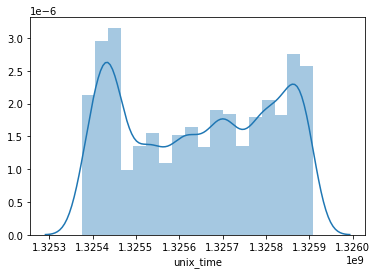

In [11]:
sns.distplot(data_sample['unix_time'])

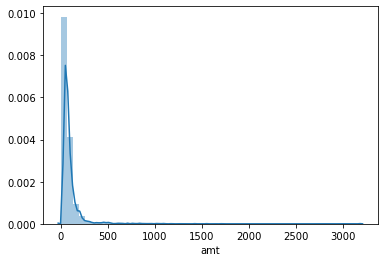

In [12]:
sns.distplot(data_sample['amt'])

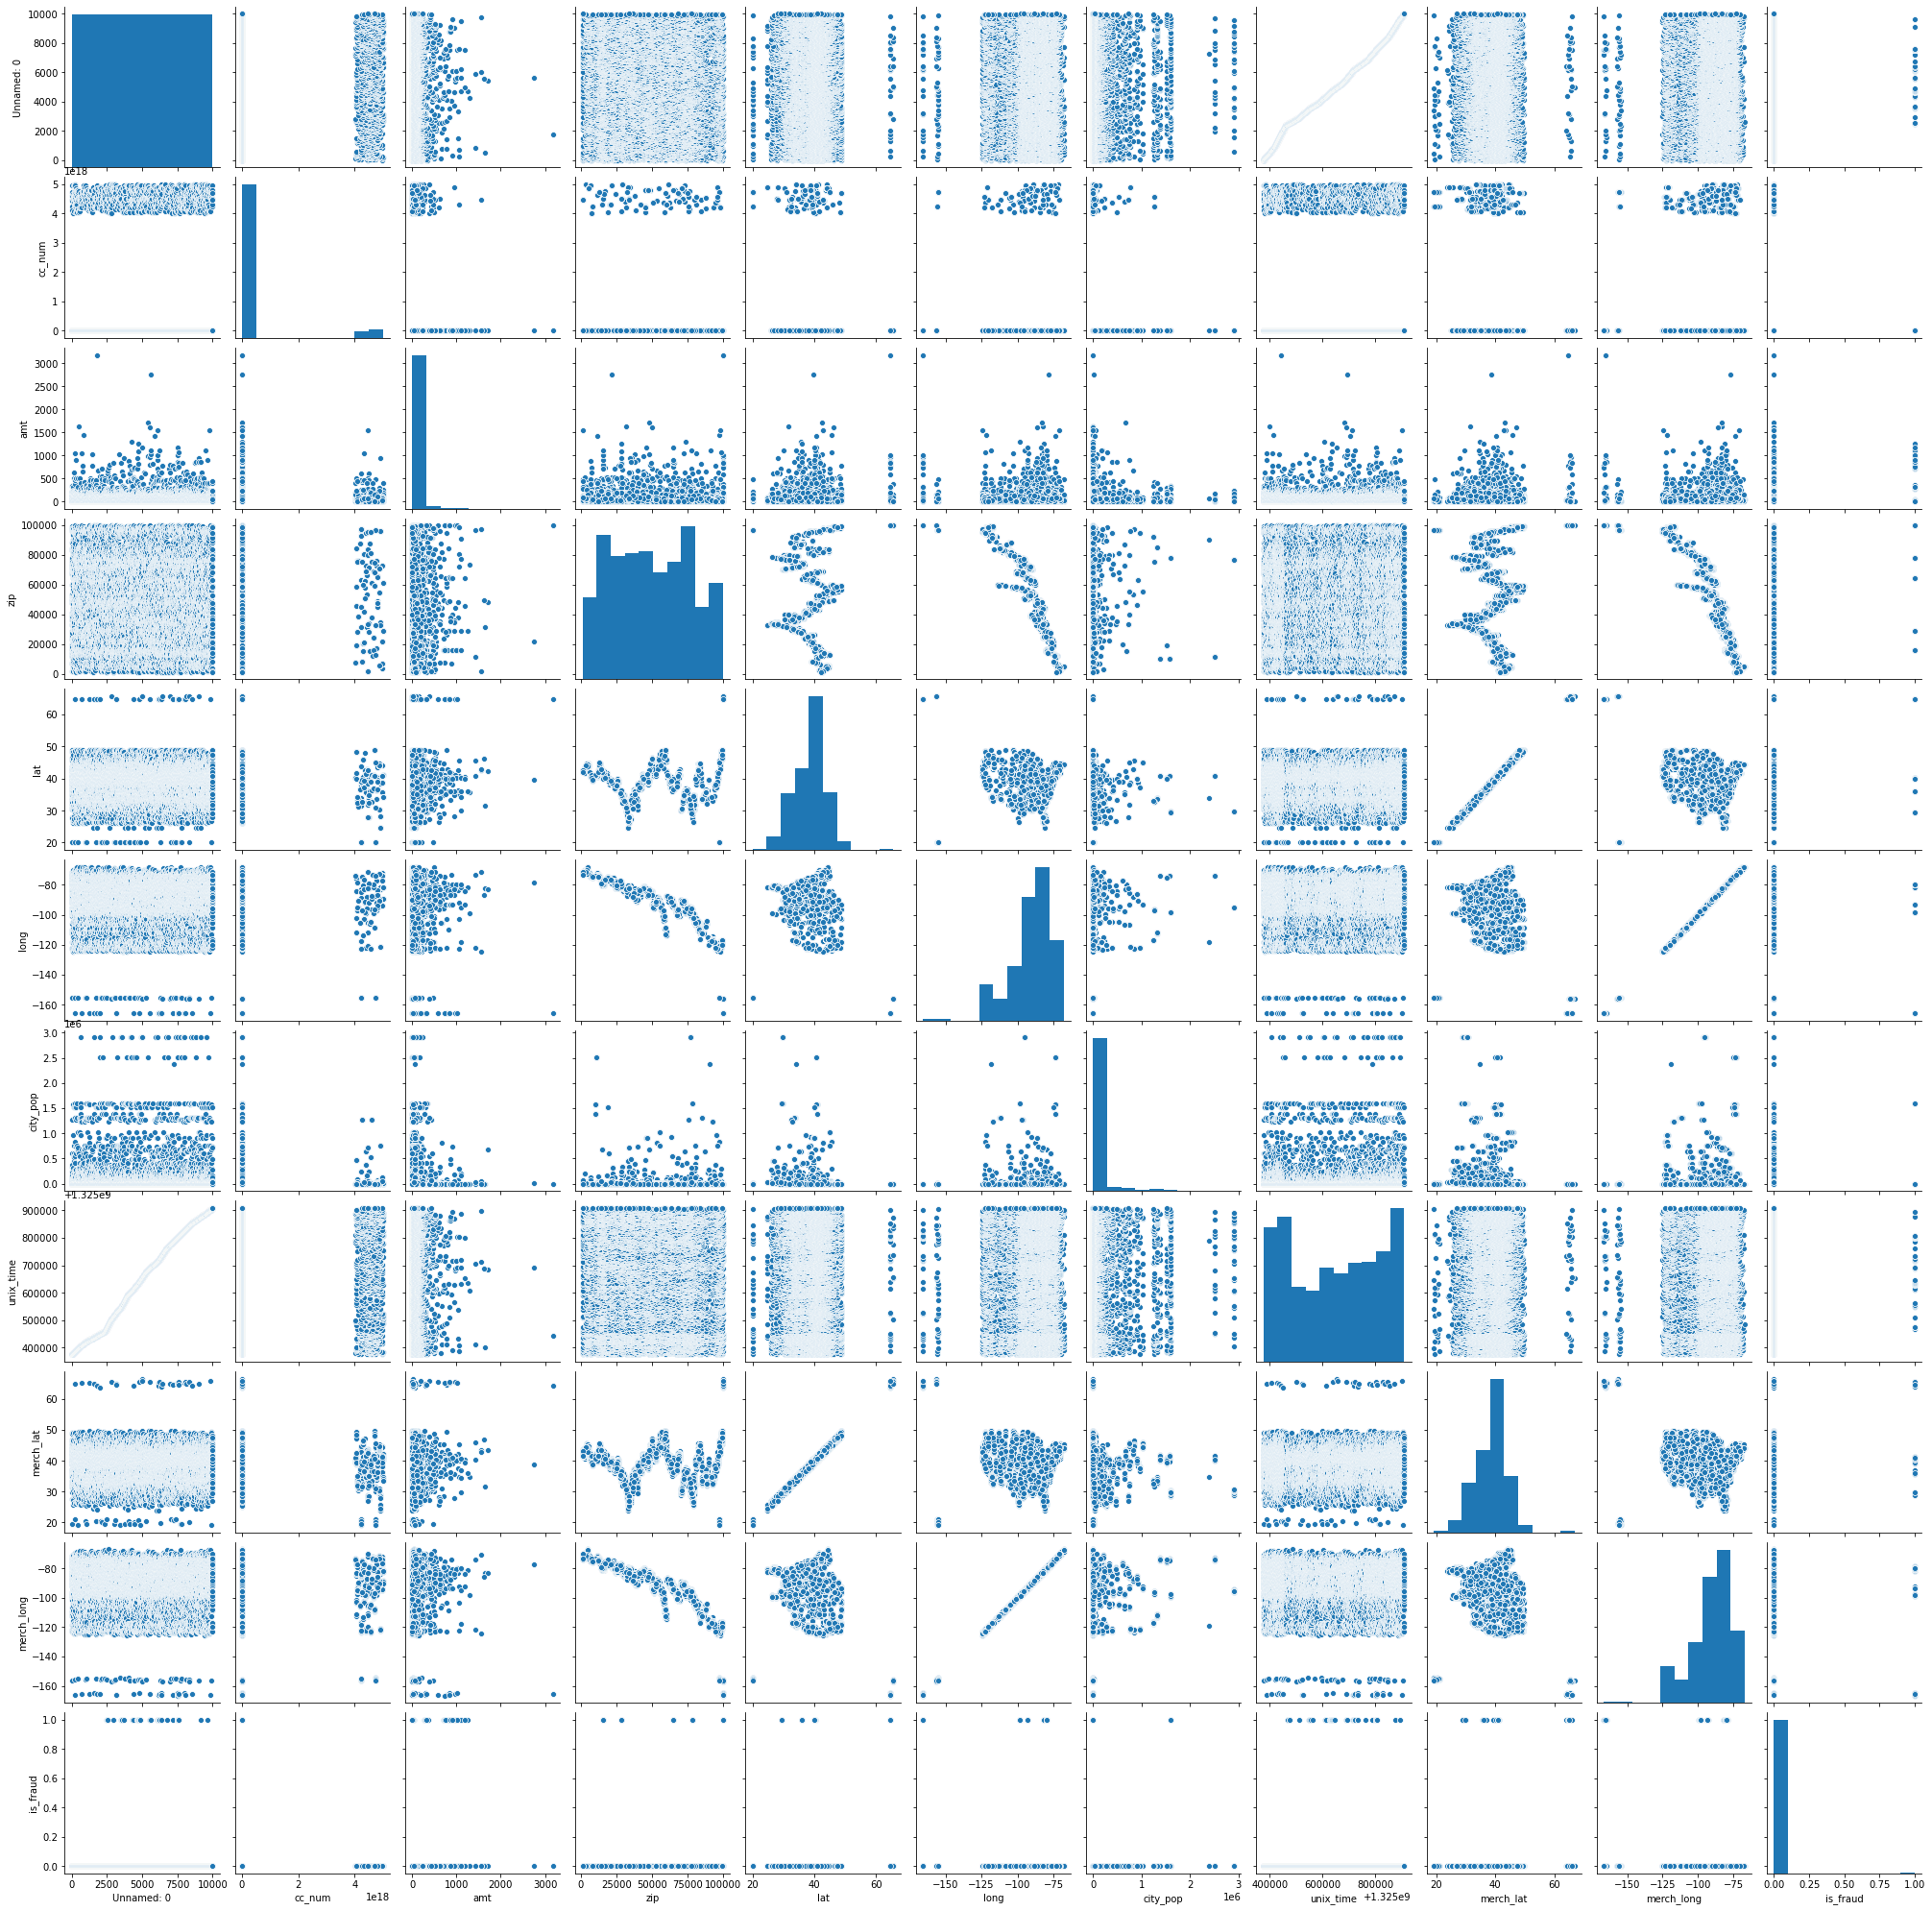

In [13]:
sns.pairplot(data_sample)

#### Fraud/non-fraud transaction distribution

In [14]:
data_read['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

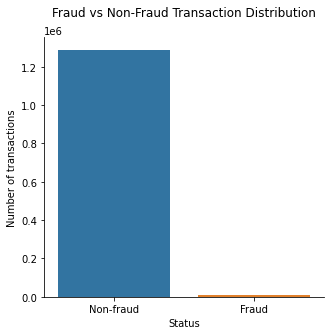

In [15]:
### Visualize the fraud/non-fraud transaction distribution

fig = sns.catplot('is_fraud', data=data_read, kind='count', height=4.5, aspect=1)
plt.title("Fraud vs Non-Fraud Transaction Distribution\n")
plt.savefig("../static/images/distribution.jpg", bbox_inches='tight')
plt.ylabel("Number of transactions")
plt.xlabel("Status")
fig.set_xticklabels(['Non-fraud', 'Fraud'])
plt.show()

The dataset is imbalanced with 1289169 legitimate transactions and 7506 fraud transactions 

In [16]:
data_notfraud = data_read[data_read.is_fraud==0]
data_fraud = data_read[data_read.is_fraud==1]

In [17]:
data_notfraud.shape, data_fraud.shape

((1289169, 23), (7506, 23))

In [18]:
data_notfraud['amt'].describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [19]:
data_fraud['amt'].describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

# Balancing the data

### Up Sampling minority class

In [20]:
from sklearn.utils import resample

In [21]:
#separate majority and minority classes
df_majority = data_read[data_read.is_fraud==0]
df_minority = data_read[data_read.is_fraud==1]
print(df_majority.size)
print(df_minority.size)
data_read.is_fraud.value_counts()

29650887
172638


0    1289169
1       7506
Name: is_fraud, dtype: int64

In [22]:
# Upsample minority class
# nsamples = df_majority.is_fraud.count()

nsamples = round(df_majority.is_fraud.count()/2).astype(int)

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=nsamples,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled.is_fraud.value_counts()

1    644584
Name: is_fraud, dtype: int64

In [23]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69495,69495,2019-02-10 23:27:41,4669558618943766,fraud_Boyer-Reichert,shopping_net,980.79,Daniel,Hernandez,M,7340 Mcgrath Islands,...,41.1039,-72.3674,4299,Broadcast presenter,1968-10-26,e1929fa20733c22938029276c11d1d16,1328916461,41.924326,-72.787852,1
1133864,1133864,2020-04-17 13:51:50,30263540414123,"fraud_Streich, Dietrich and Barton",shopping_net,974.97,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,e26550509ff8bae768d25965f4459059,1366206710,37.589782,-111.710477,1
815199,815199,2019-12-07 23:56:59,4430881574719618,fraud_Schumm PLC,shopping_net,931.28,Alicia,Morales,F,4456 Dunn Roads,...,39.3199,-106.6596,61,Public relations account executive,1939-11-04,2fc589f78dd34f3c5462d53cfde79ff2,1354924619,38.511562,-106.994630,1
273012,273012,2019-05-15 02:28:13,3575540972310993,fraud_Luettgen PLC,gas_transport,6.81,Rachel,Villarreal,F,250 Carrie Throughway,...,34.3396,-89.5736,4198,Curator,2001-06-22,f489de72a73785fc366d7e81d5c055a3,1337048893,34.872931,-89.679913,1


In [24]:
df_upsampled.is_fraud.value_counts()

0    1289169
1     644584
Name: is_fraud, dtype: int64

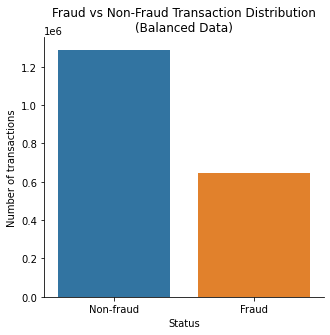

In [25]:
# Visualize the distribtution with the balanced dataset
fig = sns.catplot('is_fraud', data=df_upsampled, kind='count', height=4.5, aspect=1)
plt.title("Fraud vs Non-Fraud Transaction Distribution\n(Balanced Data)")
plt.savefig("../static/images/distribution_balanced.jpg", bbox_inches='tight')
plt.ylabel("Number of transactions")
plt.xlabel("Status")
fig.set_xticklabels(['Non-fraud', 'Fraud'])
plt.show()

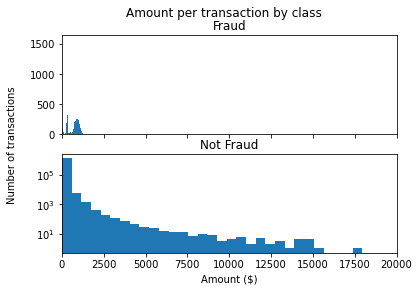

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(data_fraud.amt, bins = bins)
ax1.set_title('Fraud')
ax2.hist(data_notfraud.amt, bins = bins)
ax2.set_title('Not Fraud')

plt.xlabel('Amount ($)')
f.text(.01, .5, 'Number of transactions', ha='center', va='center', rotation='vertical')
plt.xlim((0, 20000))
plt.yscale('log')
plt.savefig("../static/images/histogram_balanced.jpg", bbox_inches='tight')
plt.show()

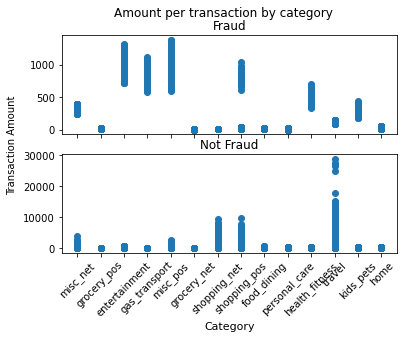

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by category')
ax1.scatter(data_fraud.category, data_fraud.amt)
ax1.set_title('Fraud')
ax2.scatter(data_notfraud.category, data_notfraud.amt)
ax2.set_title('Not Fraud')
plt.xlabel('Category', fontsize=11)
plt.xticks(rotation=45)
f.text(.01, .5, 'Transaction Amount', ha='center', va='center', rotation='vertical')
plt.savefig("../static/images/category-plot.jpg",  bbox_inches='tight')
plt.show();

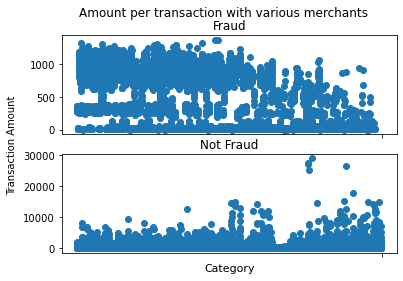

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction with various merchants')
ax1.scatter(data_fraud.merchant, data_fraud.amt)
ax1.set_title('Fraud')
ax2.scatter(data_notfraud.merchant, data_notfraud.amt)
ax2.set_title('Not Fraud')
plt.xlabel('Category', fontsize=11)
plt.xticks("",rotation=45)
f.text(.01, .5, 'Transaction Amount', ha='center', va='center', rotation='vertical')
plt.savefig("../static/images/merchant-plot.jpg",  bbox_inches='tight')
plt.show();

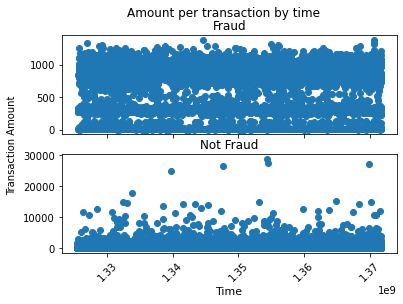

<Figure size 288x720 with 0 Axes>

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by time')

ax1.scatter(data_fraud.unix_time, data_fraud.amt)
ax1.set_title('Fraud')
ax2.scatter(data_notfraud.unix_time, data_notfraud.amt)
ax2.set_title('Not Fraud')
plt.xlabel('Time', fontsize=11)
f.text(.01, .5, 'Transaction Amount', ha='center', va='center', rotation='vertical')
plt.xticks(rotation=45)
# plt.ylabel('Amount')
plt.figure(figsize=(4, 10))
plt.savefig("../static/images/unixtime-plot.jpg",  bbox_inches='tight')
plt.show()

In [30]:
data_sample = data_read.sample(frac=0.1, random_state=1)
data_sample.shape

(129668, 23)

### Data Transformation

Convert categorical data to numeric

In [31]:
# Convert the date of birth into numeric as age
data_train = df_upsampled
data_train['dob']= pd.to_datetime(data_train['dob'])
data_train['dob']

from datetime import datetime
today = datetime.today()
data_train['age'] = round(data_train['dob'].apply(lambda x: (today - x).days//365.25),0)
data_train['age']

0          33.0
1          42.0
2          59.0
3          54.0
4          34.0
           ... 
69495      52.0
1133864    59.0
815199     81.0
273012     19.0
531951     44.0
Name: age, Length: 1933753, dtype: float64

In [32]:
# Display the dataframe column names
data_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [33]:
# Select the columns which are required for the further processing
data_train = data_train[["category", "cc_num", "amt", "lat","long", "job", "age", "trans_num", 
                         "unix_time", "merch_lat","merch_long", "is_fraud"]]
data_train.head()

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,2703186189652095,4.97,36.0788,-81.1781,"Psychologist, counselling",33.0,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,grocery_pos,630423337322,107.23,48.8878,-118.2105,Special educational needs teacher,42.0,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,entertainment,38859492057661,220.11,42.1808,-112.2620,Nature conservation officer,59.0,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,gas_transport,3534093764340240,45.00,46.2306,-112.1138,Patent attorney,54.0,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,misc_pos,375534208663984,41.96,38.4207,-79.4629,Dance movement psychotherapist,34.0,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Label Encoding

In [34]:
# Encode the transaction number and convert into numeric
from sklearn.preprocessing import LabelEncoder

get_transnum = data_train['trans_num']
label_encoder = LabelEncoder()
label_encoder.fit(get_transnum)
encoded_transnum = label_encoder.transform(get_transnum)
data_train['trans_num'] = encoded_transnum

In [35]:
# Encode the category and convert into numeric
get_category = data_train['category']
label_encoder = LabelEncoder()
label_encoder.fit(get_category)
encoded_category = label_encoder.transform(get_category)
data_train['category'] = encoded_category

In [36]:
# Encode the job and convert into numeric
get_job = data_train['job']
label_encoder = LabelEncoder()
label_encoder.fit(get_job)
encoded_job = label_encoder.transform(get_job)
data_train['job'] = encoded_job

In [37]:
# sets y to is_fraud
target = data_train["is_fraud"].values.reshape(-1, 1)

# Define the features
selected_features = data_train.drop('is_fraud', axis=1)

In [38]:
selected_features

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long
0,8,2703186189652095,4.97,36.0788,-81.1781,370,33.0,56438,1325376018,36.011293,-82.048315
1,4,630423337322,107.23,48.8878,-118.2105,428,42.0,159395,1325376044,49.159047,-118.186462
2,0,38859492057661,220.11,42.1808,-112.2620,307,59.0,818703,1325376051,43.150704,-112.154481
3,2,3534093764340240,45.00,46.2306,-112.1138,328,54.0,544575,1325376076,47.034331,-112.561071
4,9,375534208663984,41.96,38.4207,-79.4629,116,34.0,831111,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...
69495,11,4669558618943766,980.79,41.1039,-72.3674,52,52.0,1142762,1328916461,41.924326,-72.787852
1133864,11,30263540414123,974.97,37.7175,-112.4777,215,59.0,1146982,1366206710,37.589782,-111.710477
815199,11,4430881574719618,931.28,39.3199,-106.6596,378,81.0,241911,1354924619,38.511562,-106.994630
273012,2,3575540972310993,6.81,34.3396,-89.5736,114,19.0,1238805,1337048893,34.872931,-89.679913


## Split and Scale the data

In [39]:
# Import the dependecnies
from sklearn.model_selection import train_test_split

# Split the selected dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [40]:
# Scale the train & test datasets
from sklearn.preprocessing import StandardScaler

# Create a standard scaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest Classifier

In [41]:
# Use the Random Forest Classifier Model to get the feature importance/weightage
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the random forest model to X and y
rf = rf.fit(X_train_scaled, y_train)

# Return the importance of each column to predicting the outcomes
importances = rf.feature_importances_
importances

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.12237154, 0.01478826, 0.71490251, 0.01516699, 0.01389528,
       0.01662151, 0.02251884, 0.01420563, 0.03228738, 0.0165991 ,
       0.01664294])

In [42]:
# Sort each column in order of importance
rf_weights = sorted(zip(importances, selected_features.keys()), reverse=True)
rf_weights

[(0.7149025126145472, 'amt'),
 (0.1223715440854756, 'category'),
 (0.03228737786580264, 'unix_time'),
 (0.022518835280555722, 'age'),
 (0.016642941980589274, 'merch_long'),
 (0.016621513870086962, 'job'),
 (0.016599104417368307, 'merch_lat'),
 (0.015166987612656757, 'lat'),
 (0.014788263035038371, 'cc_num'),
 (0.014205634937591345, 'trans_num'),
 (0.013895284300287882, 'long')]

In [43]:
# Convert the weighted feature list into a dataframe
rf_weighted_df = pd.DataFrame(rf_weights)
rf_weighted_df

,0,1
0,0.714903,amt
1,0.122372,category
2,0.032287,unix_time
3,0.022519,age
4,0.016643,merch_long
5,0.016622,job
6,0.016599,merch_lat
7,0.015167,lat
8,0.014788,cc_num
9,0.014206,trans_num


In [44]:
# Save the dataframe into a csv file for plotting
rf_weighted_df.to_csv("../exporteddata/random_forest_balanced.csv")

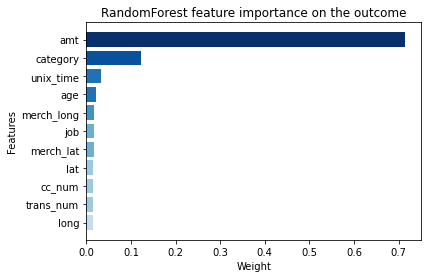

In [45]:
### Plot the random forest features

colors = ['#c6dbef','#9ecae1','#9ecae1','#9ecae1','#6baed6','#6baed6','#4292c6','#2171b5','#2171b5','#08519c','#08306b','#023858']
sorted_idx = importances.argsort()
# plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=['#FFFFCC',#D9F0A3','#ADDD8E','#78C679','#31A354','#006837'])
plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=colors)

plt.title("RandomForest feature importance on the outcome")
plt.ylabel("Features")
plt.xlabel("Weight")
plt.savefig("../static/images/randomforest_balanced.jpg",  bbox_inches='tight')
plt.show()

### XGBoost  Model

In [46]:
from xgboost import XGBRegressor

In [47]:
xgb = XGBRegressor(n_estimators=20)
xgb.fit(X_train_scaled, y_train)
xgb.feature_importances_

array([0.1971636 , 0.00596626, 0.6823884 , 0.00753582, 0.00972208,
       0.01165141, 0.04274702, 0.01001797, 0.01272814, 0.00767767,
       0.01240154], dtype=float32)

In [48]:
xgb_weights = sorted(zip(xgb.feature_importances_, selected_features.keys()), reverse=True)

In [49]:
xgb_df = pd.DataFrame(xgb_weights)
xgb_df.to_csv("../exporteddata/xgboost_features_balanced.csv")

<function matplotlib.pyplot.show(*args, **kw)>

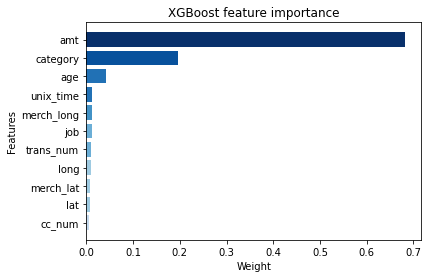

In [50]:
colors = ['#c6dbef','#9ecae1','#9ecae1','#9ecae1','#6baed6','#6baed6','#4292c6','#2171b5','#2171b5','#08519c','#08306b','#023858']

sorted_idx = xgb.feature_importances_.argsort()
plt.barh(selected_features.columns[sorted_idx], xgb.feature_importances_[sorted_idx], color=colors)
plt.title("XGBoost feature importance")
plt.xlabel("Weight")
plt.ylabel("Features")
plt.savefig("../static/images/xgb_balanced.jpg", bbox_inches='tight')
plt.show

### Correlation Diagram

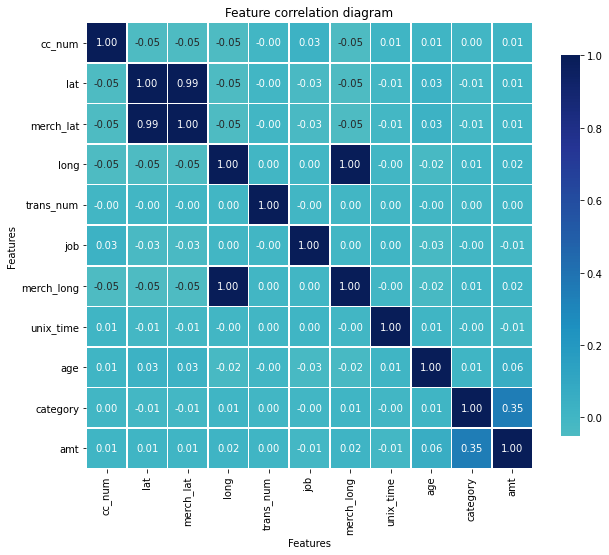

In [51]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.title("Feature correlation diagram")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.savefig("../static/images/correlation_balanced.jpg", bbox_inches='tight')
    plt.show();

correlation_heatmap(X_train[selected_features.columns[sorted_idx]])


## Logistic Regression

In [52]:
# Import the dependencies for logistic regression model
from sklearn import set_config
from sklearn.linear_model import LogisticRegression

In [53]:
# Define logisitic regression model
logistic_regn_model = LogisticRegression()
set_config(print_changed_only=False)
print(logistic_regn_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [54]:
# Train the data with the logisitic regression model
logistic_regn_model.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# Print the training score for training and testing datasets
print(f"Training Data Score: {logistic_regn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regn_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8951130582756561
Testing Data Score: 0.8948285099050759


In [56]:
# Make predictions with the test data
lr_predictions = logistic_regn_model.predict(X_test_scaled)
print(f"First 10 Predictions:   {lr_predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
print( np.unique(lr_predictions) )

First 10 Predictions:   [0 1 0 0 0 1 1 1 0 0]
First 10 Actual labels: [[0], [1], [0], [0], [0], [1], [1], [1], [0], [0]]
[0 1]


## Hyper-Parameter Tuning (logistic regression)

Using GridSearch to perform hyper-parameter tuning

In [57]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 15], 
              'penalty': ['l1', 'l2', 'elasticnet'] }
grid = GridSearchCV(logistic_regn_model, param_grid, verbose=3)

In [58]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 o

[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.896, total=   2.5s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.895, total=   1.9s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.895, total=   2.5s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.894, total=   2.6s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.896, total=   2.5s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.0s


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.896, total=   2.7s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.895, total=   2.0s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.895, total=   2.6s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.894, total=   2.8s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.896, total=   2.5s
[CV] C=5, penalty=elasticnet .........................................
[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=5, penalty=elasticnet .........................................
[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=5, penalty=elasticnet .........................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=5, penalty=elasticnet .........................................
[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=5, penalty=elasticnet .........................................
[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.896, total=   2.8s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.895, total=   2.0s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.895, total=   2.8s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.894, total=   2.9s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.896, total=   2.7s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=10, penalty=elasticnet ........................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=15, penalty=l1 ................................................
[CV] ...................... C=15, penalty=l1, score=nan, total=   0.0s
[CV] C=15, penalty=l1 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ...................... C=15, penalty=l1, score=nan, total=   0.0s
[CV] C=15, penalty=l1 ................................................
[CV] ...................... C=15, penalty=l1, score=nan, total=   0.0s
[CV] C=15, penalty=l1 ................................................
[CV] ...................... C=15, penalty=l1, score=nan, total=   0.0s
[CV] C=15, penalty=l1 ................................................
[CV] ...................... C=15, penalty=l1, score=nan, total=   0.0s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.896, total=   2.8s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.895, total=   2.2s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.895, total=   2.9s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.894, total=   2.8s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.896, total=   2.7s
[CV] C=15, penalty=elasticnet ........................................
[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=15, penalty=elasticnet ........................................
[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=15, penalty=elasticnet ........................................
[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=15, penalty=elasticnet ........................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=15, penalty=elasticnet ........................................
[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   53.8s finished
C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 15],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [59]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l2'}
0.895164771704068


In [60]:
predictions = grid.predict(X_test_scaled)
predictions

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [61]:
print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

Test Acc: 0.895


### Gradient Boosting Regressor model

In [62]:
# fitting Gradient Boosting Regressor model to see accuracy
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

gradient = GradientBoostingRegressor(alpha=.01).fit(X_train_scaled, y_train)
predictions = gradient.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = gradient.score(X_test_scaled, y_test)
print(f"MSE: {MSE}, R2: {r2}")

print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 0.03606132101844987, R2: 0.8378419534581304
First 10 Predictions:   [ 4.17762483e-02  9.88223649e-01 -8.62705143e-02  1.56207020e-02
  4.56180617e-02  9.81207613e-01  9.79946765e-01  9.92868221e-01
  1.10761810e-01 -8.60096280e-05]
First 10 Actual labels: [[0], [1], [0], [0], [0], [1], [1], [1], [0], [0]]


In [63]:
print(predictions)

[ 0.04177625  0.98822365 -0.08627051 ...  0.06846885 -0.01413335
  0.98487726]


### Gaussian Naïve Bayes Model

In [64]:
from sklearn.naive_bayes import GaussianNB 
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
gnb_prediction = gnb_model.predict(X_test_scaled)

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [65]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, gnb_prediction)*100)

Gaussian Naive Bayes model accuracy(in %): 82.96972317086541


In [66]:
print(f"First 10 Predictions:   {gnb_prediction[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 1 0 1 0 0]
First 10 Actual labels: [[0], [1], [0], [0], [0], [1], [1], [1], [0], [0]]


In [67]:
import numpy as np
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [1, 5, 10, 15], 
#               'penalty': ['l1', 'l2', 'elasticnet'] }
# param_grid = {priors=None, var_smoothing=1e-09}
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(gnb_model, param_grid, verbose=3)

In [68]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=1.0, score=0.820, total=   0.4s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=1.0, score=0.820, total=   0.4s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=1.0, score=0.820, total=   0.4s
[CV] var_smoothing=1.0 ...............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=1.0, score=0.820, total=   0.4s
[CV] var_smoothing=1.0 ...............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=1.0, score=0.820, total=   0.5s
[CV] var_smoothing=0.8111308307896871 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.8111308307896871, score=0.820, total=   0.4s
[CV] var_smoothing=0.8111308307896871 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.8111308307896871, score=0.819, total=   0.4s
[CV] var_smoothing=0.8111308307896871 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.8111308307896871, score=0.820, total=   0.4s
[CV] var_smoothing=0.8111308307896871 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.8111308307896871, score=0.820, total=   0.4s
[CV] var_smoothing=0.8111308307896871 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.8111308307896871, score=0.820, total=   0.4s
[CV] var_smoothing=0.657933224657568 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.657933224657568, score=0.820, total=   0.4s
[CV] var_smoothing=0.657933224657568 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.657933224657568, score=0.819, total=   0.5s
[CV] var_smoothing=0.657933224657568 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.657933224657568, score=0.820, total=   0.4s
[CV] var_smoothing=0.657933224657568 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.657933224657568, score=0.820, total=   0.5s
[CV] var_smoothing=0.657933224657568 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.657933224657568, score=0.819, total=   0.4s
[CV] var_smoothing=0.533669923120631 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.533669923120631, score=0.820, total=   0.5s
[CV] var_smoothing=0.533669923120631 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.533669923120631, score=0.819, total=   0.4s
[CV] var_smoothing=0.533669923120631 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.533669923120631, score=0.819, total=   0.4s
[CV] var_smoothing=0.533669923120631 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.533669923120631, score=0.820, total=   0.4s
[CV] var_smoothing=0.533669923120631 .................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... var_smoothing=0.533669923120631, score=0.819, total=   0.4s
[CV] var_smoothing=0.43287612810830584 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.43287612810830584, score=0.820, total=   0.5s
[CV] var_smoothing=0.43287612810830584 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.43287612810830584, score=0.819, total=   0.4s
[CV] var_smoothing=0.43287612810830584 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.43287612810830584, score=0.819, total=   0.4s
[CV] var_smoothing=0.43287612810830584 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.43287612810830584, score=0.819, total=   0.4s
[CV] var_smoothing=0.43287612810830584 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.43287612810830584, score=0.819, total=   0.4s
[CV] var_smoothing=0.3511191734215131 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.3511191734215131, score=0.820, total=   0.4s
[CV] var_smoothing=0.3511191734215131 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.3511191734215131, score=0.819, total=   0.4s
[CV] var_smoothing=0.3511191734215131 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.3511191734215131, score=0.819, total=   0.4s
[CV] var_smoothing=0.3511191734215131 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.3511191734215131, score=0.820, total=   0.4s
[CV] var_smoothing=0.3511191734215131 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.3511191734215131, score=0.820, total=   0.4s
[CV] var_smoothing=0.2848035868435802 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.2848035868435802, score=0.821, total=   0.4s
[CV] var_smoothing=0.2848035868435802 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.2848035868435802, score=0.819, total=   0.4s
[CV] var_smoothing=0.2848035868435802 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.2848035868435802, score=0.820, total=   0.4s
[CV] var_smoothing=0.2848035868435802 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.2848035868435802, score=0.820, total=   0.4s
[CV] var_smoothing=0.2848035868435802 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.2848035868435802, score=0.820, total=   0.4s
[CV] var_smoothing=0.23101297000831597 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.23101297000831597, score=0.821, total=   0.4s
[CV] var_smoothing=0.23101297000831597 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.23101297000831597, score=0.820, total=   0.4s
[CV] var_smoothing=0.23101297000831597 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.23101297000831597, score=0.820, total=   0.4s
[CV] var_smoothing=0.23101297000831597 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.23101297000831597, score=0.821, total=   0.4s
[CV] var_smoothing=0.23101297000831597 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.23101297000831597, score=0.821, total=   0.4s
[CV] var_smoothing=0.1873817422860384 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.1873817422860384, score=0.822, total=   0.4s
[CV] var_smoothing=0.1873817422860384 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.1873817422860384, score=0.820, total=   0.4s
[CV] var_smoothing=0.1873817422860384 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.1873817422860384, score=0.821, total=   0.4s
[CV] var_smoothing=0.1873817422860384 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.1873817422860384, score=0.822, total=   0.4s
[CV] var_smoothing=0.1873817422860384 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.1873817422860384, score=0.822, total=   0.4s
[CV] var_smoothing=0.15199110829529336 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.15199110829529336, score=0.823, total=   0.4s
[CV] var_smoothing=0.15199110829529336 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.15199110829529336, score=0.821, total=   0.4s
[CV] var_smoothing=0.15199110829529336 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.15199110829529336, score=0.822, total=   0.4s
[CV] var_smoothing=0.15199110829529336 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.15199110829529336, score=0.822, total=   0.4s
[CV] var_smoothing=0.15199110829529336 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.15199110829529336, score=0.822, total=   0.4s
[CV] var_smoothing=0.12328467394420659 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.12328467394420659, score=0.823, total=   0.4s
[CV] var_smoothing=0.12328467394420659 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.12328467394420659, score=0.822, total=   0.4s
[CV] var_smoothing=0.12328467394420659 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.12328467394420659, score=0.822, total=   0.4s
[CV] var_smoothing=0.12328467394420659 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.12328467394420659, score=0.822, total=   0.4s
[CV] var_smoothing=0.12328467394420659 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.12328467394420659, score=0.823, total=   0.4s
[CV] var_smoothing=0.1 ...............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=0.1, score=0.823, total=   0.4s
[CV] var_smoothing=0.1 ...............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=0.1, score=0.822, total=   0.4s
[CV] var_smoothing=0.1 ...............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=0.1, score=0.823, total=   0.4s
[CV] var_smoothing=0.1 ...............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=0.1, score=0.823, total=   0.4s
[CV] var_smoothing=0.1 ...............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................... var_smoothing=0.1, score=0.823, total=   0.4s
[CV] var_smoothing=0.08111308307896872 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.08111308307896872, score=0.824, total=   0.4s
[CV] var_smoothing=0.08111308307896872 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.08111308307896872, score=0.823, total=   0.4s
[CV] var_smoothing=0.08111308307896872 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.08111308307896872, score=0.823, total=   0.4s
[CV] var_smoothing=0.08111308307896872 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.08111308307896872, score=0.823, total=   0.4s
[CV] var_smoothing=0.08111308307896872 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.08111308307896872, score=0.824, total=   0.4s
[CV] var_smoothing=0.0657933224657568 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0657933224657568, score=0.825, total=   0.4s
[CV] var_smoothing=0.0657933224657568 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0657933224657568, score=0.823, total=   0.4s
[CV] var_smoothing=0.0657933224657568 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0657933224657568, score=0.824, total=   0.4s
[CV] var_smoothing=0.0657933224657568 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0657933224657568, score=0.824, total=   0.4s
[CV] var_smoothing=0.0657933224657568 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0657933224657568, score=0.825, total=   0.4s
[CV] var_smoothing=0.0533669923120631 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0533669923120631, score=0.825, total=   0.4s
[CV] var_smoothing=0.0533669923120631 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0533669923120631, score=0.824, total=   0.4s
[CV] var_smoothing=0.0533669923120631 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0533669923120631, score=0.824, total=   0.4s
[CV] var_smoothing=0.0533669923120631 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0533669923120631, score=0.825, total=   0.4s
[CV] var_smoothing=0.0533669923120631 ................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... var_smoothing=0.0533669923120631, score=0.826, total=   0.4s
[CV] var_smoothing=0.04328761281083057 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.04328761281083057, score=0.826, total=   0.4s
[CV] var_smoothing=0.04328761281083057 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.04328761281083057, score=0.824, total=   0.4s
[CV] var_smoothing=0.04328761281083057 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.04328761281083057, score=0.825, total=   0.4s
[CV] var_smoothing=0.04328761281083057 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.04328761281083057, score=0.825, total=   0.4s
[CV] var_smoothing=0.04328761281083057 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.04328761281083057, score=0.826, total=   0.5s
[CV] var_smoothing=0.03511191734215131 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.03511191734215131, score=0.826, total=   0.4s
[CV] var_smoothing=0.03511191734215131 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.03511191734215131, score=0.825, total=   0.4s
[CV] var_smoothing=0.03511191734215131 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.03511191734215131, score=0.825, total=   0.5s
[CV] var_smoothing=0.03511191734215131 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.03511191734215131, score=0.826, total=   0.5s
[CV] var_smoothing=0.03511191734215131 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.03511191734215131, score=0.827, total=   0.4s
[CV] var_smoothing=0.02848035868435802 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02848035868435802, score=0.827, total=   0.4s
[CV] var_smoothing=0.02848035868435802 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02848035868435802, score=0.825, total=   0.5s
[CV] var_smoothing=0.02848035868435802 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02848035868435802, score=0.825, total=   0.5s
[CV] var_smoothing=0.02848035868435802 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02848035868435802, score=0.827, total=   0.5s
[CV] var_smoothing=0.02848035868435802 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02848035868435802, score=0.828, total=   0.4s
[CV] var_smoothing=0.02310129700083159 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02310129700083159, score=0.828, total=   0.5s
[CV] var_smoothing=0.02310129700083159 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02310129700083159, score=0.825, total=   0.4s
[CV] var_smoothing=0.02310129700083159 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02310129700083159, score=0.826, total=   0.5s
[CV] var_smoothing=0.02310129700083159 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02310129700083159, score=0.827, total=   0.4s
[CV] var_smoothing=0.02310129700083159 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.02310129700083159, score=0.829, total=   0.4s
[CV] var_smoothing=0.01873817422860384 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01873817422860384, score=0.828, total=   0.5s
[CV] var_smoothing=0.01873817422860384 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01873817422860384, score=0.826, total=   0.5s
[CV] var_smoothing=0.01873817422860384 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01873817422860384, score=0.826, total=   0.5s
[CV] var_smoothing=0.01873817422860384 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01873817422860384, score=0.827, total=   0.5s
[CV] var_smoothing=0.01873817422860384 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01873817422860384, score=0.830, total=   0.5s
[CV] var_smoothing=0.01519911082952933 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01519911082952933, score=0.829, total=   0.5s
[CV] var_smoothing=0.01519911082952933 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01519911082952933, score=0.826, total=   0.5s
[CV] var_smoothing=0.01519911082952933 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01519911082952933, score=0.827, total=   0.5s
[CV] var_smoothing=0.01519911082952933 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01519911082952933, score=0.828, total=   0.5s
[CV] var_smoothing=0.01519911082952933 ...............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ... var_smoothing=0.01519911082952933, score=0.830, total=   0.4s
[CV] var_smoothing=0.012328467394420659 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.012328467394420659, score=0.829, total=   0.5s
[CV] var_smoothing=0.012328467394420659 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.012328467394420659, score=0.826, total=   0.4s
[CV] var_smoothing=0.012328467394420659 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.012328467394420659, score=0.827, total=   0.5s
[CV] var_smoothing=0.012328467394420659 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.012328467394420659, score=0.828, total=   0.4s
[CV] var_smoothing=0.012328467394420659 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.012328467394420659, score=0.831, total=   0.5s
[CV] var_smoothing=0.01 ..............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. var_smoothing=0.01, score=0.829, total=   0.5s
[CV] var_smoothing=0.01 ..............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. var_smoothing=0.01, score=0.827, total=   0.4s
[CV] var_smoothing=0.01 ..............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. var_smoothing=0.01, score=0.827, total=   0.5s
[CV] var_smoothing=0.01 ..............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. var_smoothing=0.01, score=0.828, total=   0.5s
[CV] var_smoothing=0.01 ..............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................. var_smoothing=0.01, score=0.831, total=   0.4s
[CV] var_smoothing=0.008111308307896872 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.008111308307896872, score=0.830, total=   0.4s
[CV] var_smoothing=0.008111308307896872 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.008111308307896872, score=0.827, total=   0.5s
[CV] var_smoothing=0.008111308307896872 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.008111308307896872, score=0.827, total=   0.4s
[CV] var_smoothing=0.008111308307896872 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.008111308307896872, score=0.829, total=   0.5s
[CV] var_smoothing=0.008111308307896872 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.008111308307896872, score=0.831, total=   0.4s
[CV] var_smoothing=0.006579332246575682 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.006579332246575682, score=0.830, total=   0.4s
[CV] var_smoothing=0.006579332246575682 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.006579332246575682, score=0.827, total=   0.4s
[CV] var_smoothing=0.006579332246575682 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.006579332246575682, score=0.828, total=   0.4s
[CV] var_smoothing=0.006579332246575682 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.006579332246575682, score=0.829, total=   0.5s
[CV] var_smoothing=0.006579332246575682 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.006579332246575682, score=0.831, total=   0.4s
[CV] var_smoothing=0.005336699231206307 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.005336699231206307, score=0.830, total=   0.4s
[CV] var_smoothing=0.005336699231206307 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.005336699231206307, score=0.827, total=   0.4s
[CV] var_smoothing=0.005336699231206307 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.005336699231206307, score=0.828, total=   0.5s
[CV] var_smoothing=0.005336699231206307 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.005336699231206307, score=0.829, total=   0.4s
[CV] var_smoothing=0.005336699231206307 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.005336699231206307, score=0.832, total=   0.6s
[CV] var_smoothing=0.004328761281083057 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.004328761281083057, score=0.830, total=   0.4s
[CV] var_smoothing=0.004328761281083057 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.004328761281083057, score=0.828, total=   0.5s
[CV] var_smoothing=0.004328761281083057 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.004328761281083057, score=0.828, total=   0.5s
[CV] var_smoothing=0.004328761281083057 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.004328761281083057, score=0.829, total=   0.5s
[CV] var_smoothing=0.004328761281083057 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.004328761281083057, score=0.832, total=   0.4s
[CV] var_smoothing=0.003511191734215131 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.003511191734215131, score=0.831, total=   0.5s
[CV] var_smoothing=0.003511191734215131 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.003511191734215131, score=0.828, total=   0.4s
[CV] var_smoothing=0.003511191734215131 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.003511191734215131, score=0.828, total=   0.4s
[CV] var_smoothing=0.003511191734215131 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.003511191734215131, score=0.829, total=   0.4s
[CV] var_smoothing=0.003511191734215131 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.003511191734215131, score=0.832, total=   0.4s
[CV] var_smoothing=0.002848035868435802 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.002848035868435802, score=0.831, total=   0.4s
[CV] var_smoothing=0.002848035868435802 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.002848035868435802, score=0.828, total=   0.4s
[CV] var_smoothing=0.002848035868435802 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.002848035868435802, score=0.828, total=   0.5s
[CV] var_smoothing=0.002848035868435802 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.002848035868435802, score=0.830, total=   0.5s
[CV] var_smoothing=0.002848035868435802 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.002848035868435802, score=0.832, total=   0.5s
[CV] var_smoothing=0.0023101297000831605 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0023101297000831605, score=0.831, total=   0.4s
[CV] var_smoothing=0.0023101297000831605 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0023101297000831605, score=0.828, total=   0.5s
[CV] var_smoothing=0.0023101297000831605 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0023101297000831605, score=0.828, total=   0.5s
[CV] var_smoothing=0.0023101297000831605 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0023101297000831605, score=0.830, total=   0.5s
[CV] var_smoothing=0.0023101297000831605 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0023101297000831605, score=0.832, total=   0.5s
[CV] var_smoothing=0.001873817422860383 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.001873817422860383, score=0.831, total=   0.5s
[CV] var_smoothing=0.001873817422860383 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.001873817422860383, score=0.828, total=   0.5s
[CV] var_smoothing=0.001873817422860383 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.001873817422860383, score=0.828, total=   0.5s
[CV] var_smoothing=0.001873817422860383 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.001873817422860383, score=0.830, total=   0.5s
[CV] var_smoothing=0.001873817422860383 ..............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .. var_smoothing=0.001873817422860383, score=0.832, total=   0.5s
[CV] var_smoothing=0.0015199110829529332 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0015199110829529332, score=0.831, total=   0.4s
[CV] var_smoothing=0.0015199110829529332 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0015199110829529332, score=0.828, total=   0.5s
[CV] var_smoothing=0.0015199110829529332 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0015199110829529332, score=0.828, total=   0.5s
[CV] var_smoothing=0.0015199110829529332 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0015199110829529332, score=0.830, total=   0.4s
[CV] var_smoothing=0.0015199110829529332 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0015199110829529332, score=0.832, total=   0.4s
[CV] var_smoothing=0.0012328467394420659 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0012328467394420659, score=0.831, total=   0.5s
[CV] var_smoothing=0.0012328467394420659 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0012328467394420659, score=0.828, total=   0.5s
[CV] var_smoothing=0.0012328467394420659 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0012328467394420659, score=0.828, total=   0.5s
[CV] var_smoothing=0.0012328467394420659 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0012328467394420659, score=0.830, total=   0.4s
[CV] var_smoothing=0.0012328467394420659 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0012328467394420659, score=0.832, total=   0.4s
[CV] var_smoothing=0.001 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=0.001, score=0.831, total=   0.5s
[CV] var_smoothing=0.001 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=0.001, score=0.828, total=   0.5s
[CV] var_smoothing=0.001 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=0.001, score=0.828, total=   0.4s
[CV] var_smoothing=0.001 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=0.001, score=0.830, total=   0.4s
[CV] var_smoothing=0.001 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=0.001, score=0.832, total=   0.4s
[CV] var_smoothing=0.0008111308307896872 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0008111308307896872, score=0.831, total=   0.4s
[CV] var_smoothing=0.0008111308307896872 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0008111308307896872, score=0.828, total=   0.4s
[CV] var_smoothing=0.0008111308307896872 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0008111308307896872, score=0.828, total=   0.5s
[CV] var_smoothing=0.0008111308307896872 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0008111308307896872, score=0.830, total=   0.5s
[CV] var_smoothing=0.0008111308307896872 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0008111308307896872, score=0.832, total=   0.4s
[CV] var_smoothing=0.0006579332246575676 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0006579332246575676, score=0.831, total=   0.5s
[CV] var_smoothing=0.0006579332246575676 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0006579332246575676, score=0.828, total=   0.4s
[CV] var_smoothing=0.0006579332246575676 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0006579332246575676, score=0.828, total=   0.4s
[CV] var_smoothing=0.0006579332246575676 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0006579332246575676, score=0.830, total=   0.4s
[CV] var_smoothing=0.0006579332246575676 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0006579332246575676, score=0.833, total=   0.4s
[CV] var_smoothing=0.0005336699231206307 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0005336699231206307, score=0.831, total=   0.5s
[CV] var_smoothing=0.0005336699231206307 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0005336699231206307, score=0.828, total=   0.4s
[CV] var_smoothing=0.0005336699231206307 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0005336699231206307, score=0.828, total=   0.4s
[CV] var_smoothing=0.0005336699231206307 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0005336699231206307, score=0.830, total=   0.4s
[CV] var_smoothing=0.0005336699231206307 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0005336699231206307, score=0.833, total=   0.4s
[CV] var_smoothing=0.0004328761281083057 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0004328761281083057, score=0.831, total=   0.4s
[CV] var_smoothing=0.0004328761281083057 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0004328761281083057, score=0.828, total=   0.5s
[CV] var_smoothing=0.0004328761281083057 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0004328761281083057, score=0.828, total=   0.5s
[CV] var_smoothing=0.0004328761281083057 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0004328761281083057, score=0.830, total=   0.5s
[CV] var_smoothing=0.0004328761281083057 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0004328761281083057, score=0.833, total=   0.5s
[CV] var_smoothing=0.0003511191734215131 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0003511191734215131, score=0.831, total=   0.5s
[CV] var_smoothing=0.0003511191734215131 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0003511191734215131, score=0.828, total=   0.4s
[CV] var_smoothing=0.0003511191734215131 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0003511191734215131, score=0.828, total=   0.5s
[CV] var_smoothing=0.0003511191734215131 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0003511191734215131, score=0.830, total=   0.5s
[CV] var_smoothing=0.0003511191734215131 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0003511191734215131, score=0.833, total=   0.4s
[CV] var_smoothing=0.0002848035868435802 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002848035868435802, score=0.831, total=   0.4s
[CV] var_smoothing=0.0002848035868435802 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002848035868435802, score=0.828, total=   0.5s
[CV] var_smoothing=0.0002848035868435802 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002848035868435802, score=0.828, total=   0.4s
[CV] var_smoothing=0.0002848035868435802 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002848035868435802, score=0.830, total=   0.4s
[CV] var_smoothing=0.0002848035868435802 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002848035868435802, score=0.833, total=   0.5s
[CV] var_smoothing=0.0002310129700083158 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002310129700083158, score=0.831, total=   0.5s
[CV] var_smoothing=0.0002310129700083158 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002310129700083158, score=0.828, total=   0.5s
[CV] var_smoothing=0.0002310129700083158 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002310129700083158, score=0.828, total=   0.5s
[CV] var_smoothing=0.0002310129700083158 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002310129700083158, score=0.830, total=   0.5s
[CV] var_smoothing=0.0002310129700083158 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0002310129700083158, score=0.833, total=   0.5s
[CV] var_smoothing=0.0001873817422860383 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001873817422860383, score=0.831, total=   0.5s
[CV] var_smoothing=0.0001873817422860383 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001873817422860383, score=0.828, total=   0.4s
[CV] var_smoothing=0.0001873817422860383 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001873817422860383, score=0.828, total=   0.5s
[CV] var_smoothing=0.0001873817422860383 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001873817422860383, score=0.830, total=   0.5s
[CV] var_smoothing=0.0001873817422860383 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001873817422860383, score=0.833, total=   0.5s
[CV] var_smoothing=0.0001519911082952933 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001519911082952933, score=0.831, total=   0.5s
[CV] var_smoothing=0.0001519911082952933 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001519911082952933, score=0.828, total=   0.4s
[CV] var_smoothing=0.0001519911082952933 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001519911082952933, score=0.828, total=   0.4s
[CV] var_smoothing=0.0001519911082952933 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001519911082952933, score=0.830, total=   0.4s
[CV] var_smoothing=0.0001519911082952933 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001519911082952933, score=0.833, total=   0.5s
[CV] var_smoothing=0.0001232846739442066 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001232846739442066, score=0.831, total=   0.5s
[CV] var_smoothing=0.0001232846739442066 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001232846739442066, score=0.828, total=   0.4s
[CV] var_smoothing=0.0001232846739442066 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001232846739442066, score=0.828, total=   0.4s
[CV] var_smoothing=0.0001232846739442066 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001232846739442066, score=0.830, total=   0.4s
[CV] var_smoothing=0.0001232846739442066 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=0.0001232846739442066, score=0.833, total=   0.4s
[CV] var_smoothing=0.0001 ............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................ var_smoothing=0.0001, score=0.831, total=   0.4s
[CV] var_smoothing=0.0001 ............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................ var_smoothing=0.0001, score=0.828, total=   0.4s
[CV] var_smoothing=0.0001 ............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................ var_smoothing=0.0001, score=0.828, total=   0.4s
[CV] var_smoothing=0.0001 ............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................ var_smoothing=0.0001, score=0.830, total=   0.5s
[CV] var_smoothing=0.0001 ............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................ var_smoothing=0.0001, score=0.833, total=   0.4s
[CV] var_smoothing=8.111308307896872e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-05, score=0.831, total=   0.4s
[CV] var_smoothing=8.111308307896872e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-05, score=0.828, total=   0.4s
[CV] var_smoothing=8.111308307896872e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-05, score=0.828, total=   0.4s
[CV] var_smoothing=8.111308307896872e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-05, score=0.830, total=   0.4s
[CV] var_smoothing=8.111308307896872e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-05, score=0.833, total=   0.4s
[CV] var_smoothing=6.579332246575683e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-05, score=0.831, total=   0.5s
[CV] var_smoothing=6.579332246575683e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-05, score=0.828, total=   0.4s
[CV] var_smoothing=6.579332246575683e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-05, score=0.828, total=   0.4s
[CV] var_smoothing=6.579332246575683e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-05, score=0.830, total=   0.4s
[CV] var_smoothing=6.579332246575683e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-05, score=0.833, total=   0.4s
[CV] var_smoothing=5.3366992312063123e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=5.3366992312063123e-05, score=0.831, total=   0.4s
[CV] var_smoothing=5.3366992312063123e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=5.3366992312063123e-05, score=0.828, total=   0.4s
[CV] var_smoothing=5.3366992312063123e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=5.3366992312063123e-05, score=0.828, total=   0.5s
[CV] var_smoothing=5.3366992312063123e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=5.3366992312063123e-05, score=0.830, total=   0.4s
[CV] var_smoothing=5.3366992312063123e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=5.3366992312063123e-05, score=0.833, total=   0.4s
[CV] var_smoothing=4.328761281083062e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083062e-05, score=0.831, total=   0.4s
[CV] var_smoothing=4.328761281083062e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083062e-05, score=0.828, total=   0.4s
[CV] var_smoothing=4.328761281083062e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083062e-05, score=0.828, total=   0.4s
[CV] var_smoothing=4.328761281083062e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083062e-05, score=0.830, total=   0.4s
[CV] var_smoothing=4.328761281083062e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083062e-05, score=0.833, total=   0.4s
[CV] var_smoothing=3.511191734215127e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=3.511191734215127e-05, score=0.831, total=   0.4s
[CV] var_smoothing=3.511191734215127e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=3.511191734215127e-05, score=0.828, total=   0.4s
[CV] var_smoothing=3.511191734215127e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=3.511191734215127e-05, score=0.828, total=   0.4s
[CV] var_smoothing=3.511191734215127e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=3.511191734215127e-05, score=0.830, total=   0.4s
[CV] var_smoothing=3.511191734215127e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=3.511191734215127e-05, score=0.833, total=   0.4s
[CV] var_smoothing=2.848035868435799e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-05, score=0.831, total=   0.5s
[CV] var_smoothing=2.848035868435799e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-05, score=0.828, total=   0.5s
[CV] var_smoothing=2.848035868435799e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-05, score=0.828, total=   0.5s
[CV] var_smoothing=2.848035868435799e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-05, score=0.830, total=   0.5s
[CV] var_smoothing=2.848035868435799e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-05, score=0.833, total=   0.5s
[CV] var_smoothing=2.310129700083158e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-05, score=0.831, total=   0.4s
[CV] var_smoothing=2.310129700083158e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-05, score=0.828, total=   0.5s
[CV] var_smoothing=2.310129700083158e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-05, score=0.828, total=   0.5s
[CV] var_smoothing=2.310129700083158e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-05, score=0.830, total=   0.5s
[CV] var_smoothing=2.310129700083158e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-05, score=0.833, total=   0.4s
[CV] var_smoothing=1.873817422860383e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-05, score=0.831, total=   0.5s
[CV] var_smoothing=1.873817422860383e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-05, score=0.828, total=   0.5s
[CV] var_smoothing=1.873817422860383e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-05, score=0.828, total=   0.5s
[CV] var_smoothing=1.873817422860383e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-05, score=0.830, total=   0.4s
[CV] var_smoothing=1.873817422860383e-05 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-05, score=0.833, total=   0.4s
[CV] var_smoothing=1.5199110829529332e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.5199110829529332e-05, score=0.831, total=   0.4s
[CV] var_smoothing=1.5199110829529332e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.5199110829529332e-05, score=0.828, total=   0.4s
[CV] var_smoothing=1.5199110829529332e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.5199110829529332e-05, score=0.828, total=   0.4s
[CV] var_smoothing=1.5199110829529332e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.5199110829529332e-05, score=0.830, total=   0.4s
[CV] var_smoothing=1.5199110829529332e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.5199110829529332e-05, score=0.833, total=   0.4s
[CV] var_smoothing=1.2328467394420658e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420658e-05, score=0.831, total=   0.4s
[CV] var_smoothing=1.2328467394420658e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420658e-05, score=0.828, total=   0.4s
[CV] var_smoothing=1.2328467394420658e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420658e-05, score=0.828, total=   0.4s
[CV] var_smoothing=1.2328467394420658e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420658e-05, score=0.830, total=   0.5s
[CV] var_smoothing=1.2328467394420658e-05 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420658e-05, score=0.833, total=   0.4s
[CV] var_smoothing=1e-05 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-05, score=0.831, total=   0.4s
[CV] var_smoothing=1e-05 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-05, score=0.828, total=   0.4s
[CV] var_smoothing=1e-05 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-05, score=0.828, total=   0.4s
[CV] var_smoothing=1e-05 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-05, score=0.830, total=   0.4s
[CV] var_smoothing=1e-05 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-05, score=0.833, total=   0.4s
[CV] var_smoothing=8.111308307896873e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-06, score=0.831, total=   0.4s
[CV] var_smoothing=8.111308307896873e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-06, score=0.828, total=   0.4s
[CV] var_smoothing=8.111308307896873e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-06, score=0.828, total=   0.4s
[CV] var_smoothing=8.111308307896873e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-06, score=0.830, total=   0.4s
[CV] var_smoothing=8.111308307896873e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-06, score=0.833, total=   0.4s
[CV] var_smoothing=6.579332246575683e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-06, score=0.831, total=   0.4s
[CV] var_smoothing=6.579332246575683e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-06, score=0.828, total=   0.5s
[CV] var_smoothing=6.579332246575683e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-06, score=0.828, total=   0.4s
[CV] var_smoothing=6.579332246575683e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-06, score=0.830, total=   0.4s
[CV] var_smoothing=6.579332246575683e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575683e-06, score=0.833, total=   0.4s
[CV] var_smoothing=5.336699231206313e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-06, score=0.831, total=   0.4s
[CV] var_smoothing=5.336699231206313e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-06, score=0.828, total=   0.4s
[CV] var_smoothing=5.336699231206313e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-06, score=0.828, total=   0.4s
[CV] var_smoothing=5.336699231206313e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-06, score=0.830, total=   0.4s
[CV] var_smoothing=5.336699231206313e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-06, score=0.833, total=   0.4s
[CV] var_smoothing=4.328761281083053e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083053e-06, score=0.831, total=   0.4s
[CV] var_smoothing=4.328761281083053e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083053e-06, score=0.828, total=   0.4s
[CV] var_smoothing=4.328761281083053e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083053e-06, score=0.828, total=   0.4s
[CV] var_smoothing=4.328761281083053e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083053e-06, score=0.830, total=   0.5s
[CV] var_smoothing=4.328761281083053e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083053e-06, score=0.833, total=   0.4s
[CV] var_smoothing=3.5111917342151275e-06 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151275e-06, score=0.831, total=   0.4s
[CV] var_smoothing=3.5111917342151275e-06 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151275e-06, score=0.828, total=   0.5s
[CV] var_smoothing=3.5111917342151275e-06 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151275e-06, score=0.828, total=   0.5s
[CV] var_smoothing=3.5111917342151275e-06 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151275e-06, score=0.830, total=   0.4s
[CV] var_smoothing=3.5111917342151275e-06 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151275e-06, score=0.833, total=   0.4s
[CV] var_smoothing=2.848035868435799e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-06, score=0.831, total=   0.4s
[CV] var_smoothing=2.848035868435799e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-06, score=0.828, total=   0.4s
[CV] var_smoothing=2.848035868435799e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-06, score=0.828, total=   0.5s
[CV] var_smoothing=2.848035868435799e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-06, score=0.830, total=   0.4s
[CV] var_smoothing=2.848035868435799e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-06, score=0.833, total=   0.5s
[CV] var_smoothing=2.310129700083158e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-06, score=0.831, total=   0.5s
[CV] var_smoothing=2.310129700083158e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-06, score=0.828, total=   0.5s
[CV] var_smoothing=2.310129700083158e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-06, score=0.828, total=   0.5s
[CV] var_smoothing=2.310129700083158e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-06, score=0.830, total=   0.4s
[CV] var_smoothing=2.310129700083158e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-06, score=0.833, total=   0.4s
[CV] var_smoothing=1.873817422860383e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-06, score=0.831, total=   0.5s
[CV] var_smoothing=1.873817422860383e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-06, score=0.828, total=   0.5s
[CV] var_smoothing=1.873817422860383e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-06, score=0.828, total=   0.5s
[CV] var_smoothing=1.873817422860383e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-06, score=0.830, total=   0.5s
[CV] var_smoothing=1.873817422860383e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-06, score=0.833, total=   0.4s
[CV] var_smoothing=1.519911082952933e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-06, score=0.831, total=   0.5s
[CV] var_smoothing=1.519911082952933e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-06, score=0.828, total=   0.4s
[CV] var_smoothing=1.519911082952933e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-06, score=0.828, total=   0.4s
[CV] var_smoothing=1.519911082952933e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-06, score=0.830, total=   0.5s
[CV] var_smoothing=1.519911082952933e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-06, score=0.833, total=   0.5s
[CV] var_smoothing=1.232846739442066e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-06, score=0.831, total=   0.4s
[CV] var_smoothing=1.232846739442066e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-06, score=0.828, total=   0.5s
[CV] var_smoothing=1.232846739442066e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-06, score=0.828, total=   0.5s
[CV] var_smoothing=1.232846739442066e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-06, score=0.830, total=   0.4s
[CV] var_smoothing=1.232846739442066e-06 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-06, score=0.833, total=   0.4s
[CV] var_smoothing=1e-06 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-06, score=0.831, total=   0.4s
[CV] var_smoothing=1e-06 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-06, score=0.828, total=   0.4s
[CV] var_smoothing=1e-06 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-06, score=0.828, total=   0.4s
[CV] var_smoothing=1e-06 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-06, score=0.830, total=   0.4s
[CV] var_smoothing=1e-06 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-06, score=0.833, total=   0.4s
[CV] var_smoothing=8.111308307896872e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-07, score=0.831, total=   0.4s
[CV] var_smoothing=8.111308307896872e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-07, score=0.828, total=   0.5s
[CV] var_smoothing=8.111308307896872e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-07, score=0.828, total=   0.4s
[CV] var_smoothing=8.111308307896872e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-07, score=0.830, total=   0.4s
[CV] var_smoothing=8.111308307896872e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896872e-07, score=0.833, total=   0.4s
[CV] var_smoothing=6.579332246575682e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-07, score=0.831, total=   0.4s
[CV] var_smoothing=6.579332246575682e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-07, score=0.828, total=   0.5s
[CV] var_smoothing=6.579332246575682e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-07, score=0.828, total=   0.5s
[CV] var_smoothing=6.579332246575682e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-07, score=0.830, total=   0.4s
[CV] var_smoothing=6.579332246575682e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-07, score=0.833, total=   0.4s
[CV] var_smoothing=5.336699231206313e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-07, score=0.831, total=   0.6s
[CV] var_smoothing=5.336699231206313e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-07, score=0.828, total=   0.5s
[CV] var_smoothing=5.336699231206313e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-07, score=0.828, total=   0.6s
[CV] var_smoothing=5.336699231206313e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-07, score=0.830, total=   0.5s
[CV] var_smoothing=5.336699231206313e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206313e-07, score=0.833, total=   0.5s
[CV] var_smoothing=4.3287612810830526e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-07, score=0.831, total=   0.4s
[CV] var_smoothing=4.3287612810830526e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-07, score=0.828, total=   0.4s
[CV] var_smoothing=4.3287612810830526e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-07, score=0.828, total=   0.4s
[CV] var_smoothing=4.3287612810830526e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-07, score=0.830, total=   0.5s
[CV] var_smoothing=4.3287612810830526e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-07, score=0.833, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-07, score=0.831, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-07, score=0.828, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-07, score=0.828, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-07, score=0.830, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-07 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-07, score=0.833, total=   0.6s
[CV] var_smoothing=2.848035868435799e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-07, score=0.831, total=   0.5s
[CV] var_smoothing=2.848035868435799e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-07, score=0.828, total=   0.5s
[CV] var_smoothing=2.848035868435799e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-07, score=0.828, total=   0.5s
[CV] var_smoothing=2.848035868435799e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-07, score=0.830, total=   0.6s
[CV] var_smoothing=2.848035868435799e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-07, score=0.833, total=   0.5s
[CV] var_smoothing=2.310129700083158e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-07, score=0.831, total=   0.5s
[CV] var_smoothing=2.310129700083158e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-07, score=0.828, total=   0.5s
[CV] var_smoothing=2.310129700083158e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-07, score=0.828, total=   0.5s
[CV] var_smoothing=2.310129700083158e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-07, score=0.830, total=   0.5s
[CV] var_smoothing=2.310129700083158e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-07, score=0.833, total=   0.5s
[CV] var_smoothing=1.873817422860383e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-07, score=0.831, total=   0.4s
[CV] var_smoothing=1.873817422860383e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-07, score=0.828, total=   0.5s
[CV] var_smoothing=1.873817422860383e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-07, score=0.828, total=   0.4s
[CV] var_smoothing=1.873817422860383e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-07, score=0.830, total=   0.5s
[CV] var_smoothing=1.873817422860383e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-07, score=0.833, total=   0.4s
[CV] var_smoothing=1.519911082952933e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-07, score=0.831, total=   0.5s
[CV] var_smoothing=1.519911082952933e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-07, score=0.828, total=   0.4s
[CV] var_smoothing=1.519911082952933e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-07, score=0.828, total=   0.5s
[CV] var_smoothing=1.519911082952933e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-07, score=0.830, total=   0.4s
[CV] var_smoothing=1.519911082952933e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-07, score=0.833, total=   0.5s
[CV] var_smoothing=1.232846739442066e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-07, score=0.831, total=   0.5s
[CV] var_smoothing=1.232846739442066e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-07, score=0.828, total=   0.5s
[CV] var_smoothing=1.232846739442066e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-07, score=0.828, total=   0.5s
[CV] var_smoothing=1.232846739442066e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-07, score=0.830, total=   0.5s
[CV] var_smoothing=1.232846739442066e-07 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-07, score=0.833, total=   0.5s
[CV] var_smoothing=1e-07 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-07, score=0.831, total=   0.4s
[CV] var_smoothing=1e-07 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-07, score=0.828, total=   0.5s
[CV] var_smoothing=1e-07 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-07, score=0.828, total=   0.4s
[CV] var_smoothing=1e-07 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-07, score=0.830, total=   0.5s
[CV] var_smoothing=1e-07 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-07, score=0.833, total=   0.4s
[CV] var_smoothing=8.111308307896873e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-08, score=0.831, total=   0.5s
[CV] var_smoothing=8.111308307896873e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-08, score=0.828, total=   0.4s
[CV] var_smoothing=8.111308307896873e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-08, score=0.828, total=   0.5s
[CV] var_smoothing=8.111308307896873e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-08, score=0.830, total=   0.4s
[CV] var_smoothing=8.111308307896873e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896873e-08, score=0.833, total=   0.5s
[CV] var_smoothing=6.579332246575682e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-08, score=0.831, total=   0.4s
[CV] var_smoothing=6.579332246575682e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-08, score=0.828, total=   0.4s
[CV] var_smoothing=6.579332246575682e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-08, score=0.828, total=   0.5s
[CV] var_smoothing=6.579332246575682e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-08, score=0.830, total=   0.4s
[CV] var_smoothing=6.579332246575682e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-08, score=0.833, total=   0.5s
[CV] var_smoothing=5.336699231206302e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-08, score=0.831, total=   0.4s
[CV] var_smoothing=5.336699231206302e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-08, score=0.828, total=   0.5s
[CV] var_smoothing=5.336699231206302e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-08, score=0.828, total=   0.4s
[CV] var_smoothing=5.336699231206302e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-08, score=0.830, total=   0.5s
[CV] var_smoothing=5.336699231206302e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-08, score=0.833, total=   0.4s
[CV] var_smoothing=4.3287612810830526e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-08, score=0.831, total=   0.5s
[CV] var_smoothing=4.3287612810830526e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-08, score=0.828, total=   0.4s
[CV] var_smoothing=4.3287612810830526e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-08, score=0.828, total=   0.5s
[CV] var_smoothing=4.3287612810830526e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-08, score=0.830, total=   0.4s
[CV] var_smoothing=4.3287612810830526e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=4.3287612810830526e-08, score=0.833, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-08, score=0.831, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-08, score=0.828, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-08, score=0.828, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-08, score=0.830, total=   0.5s
[CV] var_smoothing=3.5111917342151277e-08 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151277e-08, score=0.833, total=   0.5s
[CV] var_smoothing=2.848035868435799e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-08, score=0.831, total=   0.5s
[CV] var_smoothing=2.848035868435799e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-08, score=0.828, total=   0.5s
[CV] var_smoothing=2.848035868435799e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-08, score=0.828, total=   0.5s
[CV] var_smoothing=2.848035868435799e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-08, score=0.830, total=   0.5s
[CV] var_smoothing=2.848035868435799e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435799e-08, score=0.833, total=   0.4s
[CV] var_smoothing=2.310129700083158e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-08, score=0.831, total=   0.5s
[CV] var_smoothing=2.310129700083158e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-08, score=0.828, total=   0.4s
[CV] var_smoothing=2.310129700083158e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-08, score=0.828, total=   0.4s
[CV] var_smoothing=2.310129700083158e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-08, score=0.830, total=   0.4s
[CV] var_smoothing=2.310129700083158e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-08, score=0.833, total=   0.5s
[CV] var_smoothing=1.873817422860383e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-08, score=0.831, total=   0.5s
[CV] var_smoothing=1.873817422860383e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-08, score=0.828, total=   0.5s
[CV] var_smoothing=1.873817422860383e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-08, score=0.828, total=   0.4s
[CV] var_smoothing=1.873817422860383e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-08, score=0.830, total=   0.5s
[CV] var_smoothing=1.873817422860383e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860383e-08, score=0.833, total=   0.5s
[CV] var_smoothing=1.519911082952933e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-08, score=0.831, total=   0.5s
[CV] var_smoothing=1.519911082952933e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-08, score=0.828, total=   0.5s
[CV] var_smoothing=1.519911082952933e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-08, score=0.828, total=   0.5s
[CV] var_smoothing=1.519911082952933e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-08, score=0.830, total=   0.4s
[CV] var_smoothing=1.519911082952933e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-08, score=0.833, total=   0.4s
[CV] var_smoothing=1.232846739442066e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-08, score=0.831, total=   0.4s
[CV] var_smoothing=1.232846739442066e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-08, score=0.828, total=   0.4s
[CV] var_smoothing=1.232846739442066e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-08, score=0.828, total=   0.4s
[CV] var_smoothing=1.232846739442066e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-08, score=0.830, total=   0.4s
[CV] var_smoothing=1.232846739442066e-08 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.232846739442066e-08, score=0.833, total=   0.4s
[CV] var_smoothing=1e-08 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-08, score=0.831, total=   0.5s
[CV] var_smoothing=1e-08 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-08, score=0.828, total=   0.5s
[CV] var_smoothing=1e-08 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-08, score=0.828, total=   0.5s
[CV] var_smoothing=1e-08 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-08, score=0.830, total=   0.5s
[CV] var_smoothing=1e-08 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-08, score=0.833, total=   0.5s
[CV] var_smoothing=8.111308307896856e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896856e-09, score=0.831, total=   0.4s
[CV] var_smoothing=8.111308307896856e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896856e-09, score=0.828, total=   0.4s
[CV] var_smoothing=8.111308307896856e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896856e-09, score=0.828, total=   0.4s
[CV] var_smoothing=8.111308307896856e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896856e-09, score=0.830, total=   0.5s
[CV] var_smoothing=8.111308307896856e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=8.111308307896856e-09, score=0.833, total=   0.5s
[CV] var_smoothing=6.579332246575682e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-09, score=0.831, total=   0.5s
[CV] var_smoothing=6.579332246575682e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-09, score=0.828, total=   0.5s
[CV] var_smoothing=6.579332246575682e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-09, score=0.828, total=   0.4s
[CV] var_smoothing=6.579332246575682e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-09, score=0.830, total=   0.5s
[CV] var_smoothing=6.579332246575682e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=6.579332246575682e-09, score=0.833, total=   0.5s
[CV] var_smoothing=5.336699231206302e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-09, score=0.831, total=   0.4s
[CV] var_smoothing=5.336699231206302e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-09, score=0.828, total=   0.5s
[CV] var_smoothing=5.336699231206302e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-09, score=0.828, total=   0.4s
[CV] var_smoothing=5.336699231206302e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-09, score=0.830, total=   0.5s
[CV] var_smoothing=5.336699231206302e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=5.336699231206302e-09, score=0.833, total=   0.6s
[CV] var_smoothing=4.328761281083061e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083061e-09, score=0.831, total=   0.5s
[CV] var_smoothing=4.328761281083061e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083061e-09, score=0.828, total=   0.5s
[CV] var_smoothing=4.328761281083061e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083061e-09, score=0.828, total=   0.5s
[CV] var_smoothing=4.328761281083061e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083061e-09, score=0.830, total=   0.5s
[CV] var_smoothing=4.328761281083061e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=4.328761281083061e-09, score=0.833, total=   0.5s
[CV] var_smoothing=3.5111917342151273e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151273e-09, score=0.831, total=   0.5s
[CV] var_smoothing=3.5111917342151273e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151273e-09, score=0.828, total=   0.5s
[CV] var_smoothing=3.5111917342151273e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151273e-09, score=0.828, total=   0.4s
[CV] var_smoothing=3.5111917342151273e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151273e-09, score=0.830, total=   0.5s
[CV] var_smoothing=3.5111917342151273e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=3.5111917342151273e-09, score=0.833, total=   0.5s
[CV] var_smoothing=2.848035868435805e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435805e-09, score=0.831, total=   0.5s
[CV] var_smoothing=2.848035868435805e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435805e-09, score=0.828, total=   0.5s
[CV] var_smoothing=2.848035868435805e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435805e-09, score=0.828, total=   0.4s
[CV] var_smoothing=2.848035868435805e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435805e-09, score=0.830, total=   0.5s
[CV] var_smoothing=2.848035868435805e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.848035868435805e-09, score=0.833, total=   0.4s
[CV] var_smoothing=2.310129700083158e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-09, score=0.831, total=   0.5s
[CV] var_smoothing=2.310129700083158e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-09, score=0.828, total=   0.4s
[CV] var_smoothing=2.310129700083158e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-09, score=0.828, total=   0.5s
[CV] var_smoothing=2.310129700083158e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-09, score=0.830, total=   0.5s
[CV] var_smoothing=2.310129700083158e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=2.310129700083158e-09, score=0.833, total=   0.5s
[CV] var_smoothing=1.873817422860387e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860387e-09, score=0.831, total=   0.5s
[CV] var_smoothing=1.873817422860387e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860387e-09, score=0.828, total=   0.4s
[CV] var_smoothing=1.873817422860387e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860387e-09, score=0.828, total=   0.5s
[CV] var_smoothing=1.873817422860387e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860387e-09, score=0.830, total=   0.5s
[CV] var_smoothing=1.873817422860387e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.873817422860387e-09, score=0.833, total=   0.5s
[CV] var_smoothing=1.519911082952933e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-09, score=0.831, total=   0.5s
[CV] var_smoothing=1.519911082952933e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-09, score=0.828, total=   0.5s
[CV] var_smoothing=1.519911082952933e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-09, score=0.828, total=   0.5s
[CV] var_smoothing=1.519911082952933e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-09, score=0.830, total=   0.5s
[CV] var_smoothing=1.519911082952933e-09 .............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] . var_smoothing=1.519911082952933e-09, score=0.833, total=   0.5s
[CV] var_smoothing=1.2328467394420635e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420635e-09, score=0.831, total=   0.5s
[CV] var_smoothing=1.2328467394420635e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420635e-09, score=0.828, total=   0.5s
[CV] var_smoothing=1.2328467394420635e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420635e-09, score=0.828, total=   0.5s
[CV] var_smoothing=1.2328467394420635e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420635e-09, score=0.830, total=   0.4s
[CV] var_smoothing=1.2328467394420635e-09 ............................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  var_smoothing=1.2328467394420635e-09, score=0.833, total=   0.5s
[CV] var_smoothing=1e-09 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-09, score=0.831, total=   0.4s
[CV] var_smoothing=1e-09 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-09, score=0.828, total=   0.5s
[CV] var_smoothing=1e-09 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-09, score=0.828, total=   0.5s
[CV] var_smoothing=1e-09 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-09, score=0.830, total=   0.5s
[CV] var_smoothing=1e-09 .............................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ................. var_smoothing=1e-09, score=0.833, total=   0.4s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.9min finished
C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02,...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [69]:
print(grid.best_params_)
print(grid.best_score_)

{'var_smoothing': 8.111308307896873e-06}
0.8299202811669332


In [70]:
predictions = grid.predict(X_test_scaled)

print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

Test Acc: 0.830


# Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Logistic Regression

In [72]:
# Confusion Matrix for Logistic Regression Model
lr_predicted = logistic_regn_model.predict(X_test_scaled)
cf_matrix = metrics.confusion_matrix(lr_predicted, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, lr_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  315771
False Positives:  6287
False Negatives:  44557
True Positives:  116824


Gaussian Naive Bayes

In [73]:
# Confusion Matrix for Gaussian Naive Bayes Model
metrics.confusion_matrix(gnb_prediction, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, gnb_prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  316189
False Positives:  5869
False Negatives:  76462
True Positives:  84919


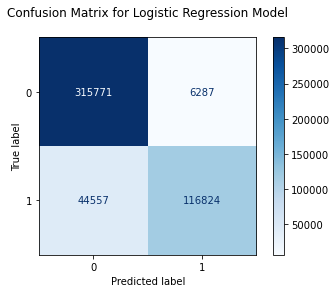

In [74]:
# Plot the confusion matrix chart
class_names =["0","1"]
plot_confusion_matrix(logistic_regn_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression Model\n")
plt.savefig("../static/images/cmatrix_logreg_balanced.jpg", bbox_inches='tight')
plt.show()

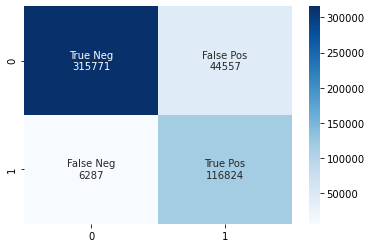

In [75]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]


labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

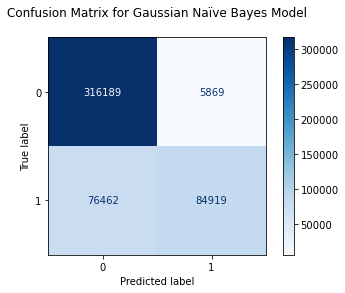

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
class_names =["0","1"]
# plt.figure()
plot_confusion_matrix(gnb_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Gaussian Naïve Bayes Model\n")
plt.savefig("../static/images/cmatrix_gnb_balanced.jpg",  bbox_inches='tight')
plt.show()

## Classification Report

In [77]:
from sklearn.metrics import classification_report

##### Logistic regression

In [78]:
#Classification Report for logisitc Regression Model
print(classification_report(y_test, lr_predictions,
                           target_names=['Genuine','Fraud']))

              precision    recall  f1-score   support

     Genuine       0.88      0.98      0.93    322058
       Fraud       0.95      0.72      0.82    161381

    accuracy                           0.89    483439
   macro avg       0.91      0.85      0.87    483439
weighted avg       0.90      0.89      0.89    483439



##### Gaussian Naïve Bayes 

In [79]:
#Classification Report for Gaussian Naïve Bayes 
print(classification_report(y_test, gnb_prediction,
                           target_names=['Genuine','Fraud']))

              precision    recall  f1-score   support

     Genuine       0.81      0.98      0.88    322058
       Fraud       0.94      0.53      0.67    161381

    accuracy                           0.83    483439
   macro avg       0.87      0.75      0.78    483439
weighted avg       0.85      0.83      0.81    483439



In [80]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = '../logistic_balanced_model.sav'
joblib.dump(logistic_regn_model, filename)


['../logistic_balanced_model.sav']

In [81]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = 'gnb_balanced_model.sav'
joblib.dump(gnb_model, filename)

['gnb_balanced_model.sav']